In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from IPython import display

from Node.functions import *
from Node.Node import Control_node
from Plant.Plant import Plant

In [2]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.0])

# Initial behavior
behav_1 = np.array([2.2])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.1])



# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    output = behavioral_model @ error
    return output



# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate




# agent two acts as the plant (error = control output)
def plant_control(control_signal, transition_matrix, state):
    output = control_signal*transition_matrix + state
    return output




agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=plant_control, state=behav_1)


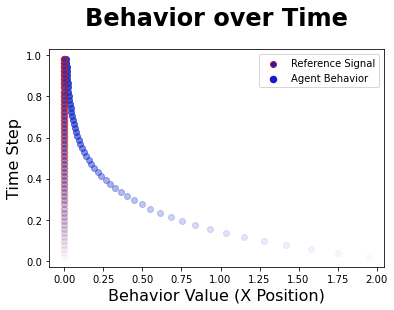

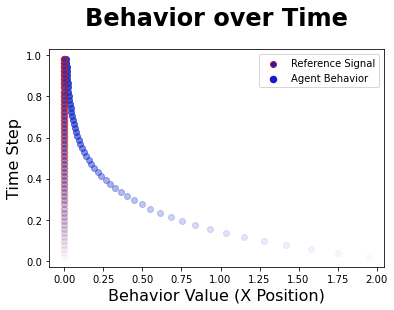

In [3]:
%matplotlib inline
trials = 50
ticks = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
behavior1 = np.array([0,0])
controller_error = []
agent1_behaviors = []
plant_outputs = []

state = np.array([2.5])
agent1_error = []
#hfont = {'fontname':'SuperClarendon'}
#plt.scatter(R1[0],R1[1], c=(0.1,0.1,0.8), edgecolors=[0.8,0.1,0.1], linewidths=1.5)
for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    b1 = agent1.go(state)   
    plant_output = plant1.transition(b1)

    agent1_behaviors.append(agent1.get_output())
    plant_outputs.append(plant_output)
    controller_error.append(agent1.get_error())
    agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    behavior1 = b1
    state = plant_output
    
    color = [0.1,0.1,0.8, (t+1)/(trials+1)]
    plt.scatter(plant_output[0],(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(agent1.get_reference()[0],(t+1)/(trials+1),c=tuple(color1), edgecolors=[0.8,0.1,0.1, color1[3]], linewidth=1.5)
    plt.legend([[agent1.get_reference()[0], 0], state], labels=["Reference Signal", "Agent Behavior"])
    lg = plt.gca().get_legend()
    lg.legendHandles[0].set_color((0.1,0.1,0.8))
    lg.legendHandles[0].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[1].set_color((0.1,0.1,0.8))
    display.clear_output(wait=True)
    plt.title("Behavior over Time", weight='bold', fontsize=24, pad=24)
    plt.xlabel("Behavior Value (X Position)", fontsize=16)
    plt.ylabel("Time Step", fontsize=16)
    display.display(plt.gcf())

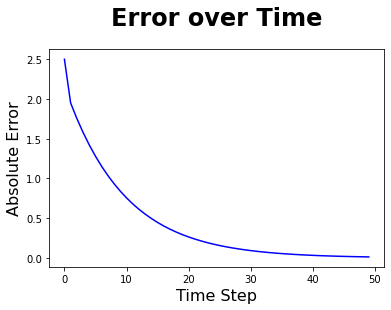

In [5]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b')
#plt.ylim([0, 1])
# plt.legend()
plt.title("Error over Time", weight='bold', fontsize=24, pad=24)
plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Absolute Error", fontsize=16)
plt.show()